This notebook allows the reproduce **Figure S1** of the paper "Covering the Combinatorial Design Space of Multiplex CRISPR/Cas Experiments in Plants" by Kirsten Van Huffel, Michiel Stock, Tom Ruttink and Bernard De Baets.

#### Load packages

In [1]:
using Random  
using Plots, StatsPlots, StatsBase
using Distributions 
using LinearAlgebra
using Combinatorics
using BioCCP


(process:5516): GLib-GIO-WARNING **: 11:57:35.149: Unexpectedly, UWP app `HaukeGtze.7-ZipFileManagerUnofficial_1.2107.2.0_x64__6bk20wvc8rfx2' (AUMId `HaukeGtze.7-ZipFileManagerUnofficial_6bk20wvc8rfx2!zFM.exe') supports 36 extensions but has no verbs


## 2. Simulation-based approach

In [2]:
include("MultiplexCrisprDOE.jl");

#### Set seed for reproducibility

In [3]:
Random.seed!(1)

TaskLocalRNG()

#### Study relation between expected plant library size for full coverage of all triple combination of gene knockouts and experimental design parameters

In [4]:
include("DefaultParameters_k=3.jl");

- Figure S1A: Influence of number of target genes on the plant library size for full combinatorial coverage

In [5]:
iter = 50
### default: 20 target genes
E_20_sim, sd_20_sim = simulate_Nₓ₃(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=iter)

E_20_bioccp, sd_20_bioccp = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

### 10 target genes
x = 10
n_gRNA_total = x * g
p_gRNA_freq = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize=true)
p_gRNA_edit = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false) 

E_10_sim, sd_10_sim = simulate_Nₓ₃(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=iter)

E_10_bioccp, sd_10_bioccp = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)


### 30 target genes
x = 30
n_gRNA_total = x * g
p_gRNA_freq = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize=true)
p_gRNA_edit = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false) 

E_30_sim, sd_30_sim = simulate_Nₓ₃(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=iter)

E_30_bioccp, sd_30_bioccp = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

### 40 target genes
x = 40
n_gRNA_total = x * g
p_gRNA_freq = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize=true)
p_gRNA_edit = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false) 

E_40_sim, sd_40_sim = simulate_Nₓ₃(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=iter)

E_40_bioccp, sd_40_bioccp = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

### 50 target genes
x = 50
n_gRNA_total = x * g
p_gRNA_freq = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize=true)
p_gRNA_edit = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false) 

E_50_sim, sd_50_sim = simulate_Nₓ₃(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=iter)

E_50_bioccp, sd_50_bioccp = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

(860486, 127120)

In [60]:
E_targets_sim

5-element Vector{Float64}:
   3072.18
  32146.88
 194344.6
 444111.88
 857194.56

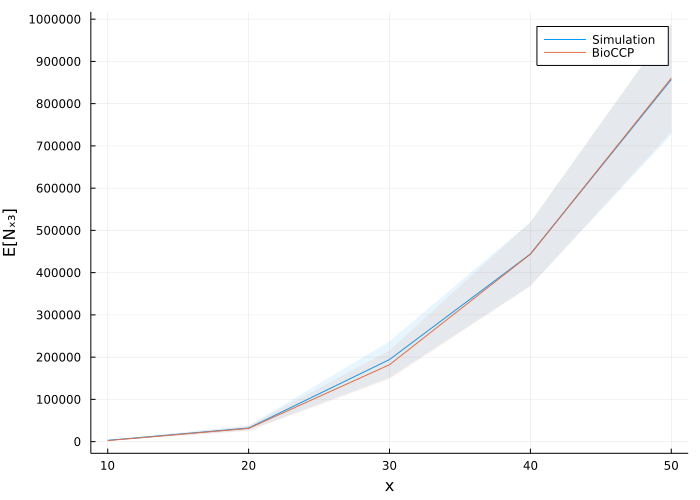

In [62]:
E_targets_sim = [E_10_sim, E_20_sim, E_30_sim , E_40_sim, E_50_sim]
E_targets_bioccp = [E_10_bioccp, E_20_bioccp, E_30_bioccp, E_40_bioccp, E_50_bioccp]
sd_targets_sim = [sd_10_sim, sd_20_sim, sd_30_sim, sd_40_sim, sd_50_sim]
sd_targets_bioccp = [sd_10_bioccp, sd_20_bioccp, sd_30_bioccp, sd_40_bioccp, sd_50_bioccp];

plot(collect(10:10:50), E_targets_sim, label="Simulation", 
    title="", xlabel="x", ylabel="E[Nₓ₃]",
    ribbon = sd_targets_sim, fillalpha=.1,
    xticks = (10:10:50, string.(10:10:50)),
    yticks = (0:100000:5000000, string.(0:100000:5000000)),
size = ((700,500)),
titlefont=font(11),
guidefontsize =11, guidefontfamily=101)

plot!(collect(10:10:50), E_targets_bioccp,  label="BioCCP",
    ribbon = sd_targets_bioccp, 
    fillalpha=.1,
)

In [68]:
E_targets_sim = [E_10_sim, E_20_sim, E_30_sim] # , E_40_sim, E_50_sim]
E_targets_bioccp = [E_10_bioccp, E_20_bioccp, E_30_bioccp] # E_40_bioccp, E_50_bioccp]
sd_targets_sim = [sd_10_sim, sd_20_sim, sd_30_sim] # sd_40_sim, sd_50_sim]
sd_targets_bioccp = [sd_10_bioccp, sd_20_bioccp, sd_30_bioccp] # sd_40_bioccp, sd_50_bioccp];

plot(collect(10:10:30), E_targets_sim, label="Simulation", 
    title="", xlabel="x", ylabel="E[Nₓ₃]",
    ribbon = sd_targets_sim, fillalpha=.1,
    xticks = (10:10:50, string.(10:10:50)),
    yticks = (0:10000:5000000, string.(0:10000:5000000)),
    ylim=((0, 220000)),
size = ((700,500)),
titlefont=font(11),
guidefontsize =11, guidefontfamily=101)

plot!(collect(10:10:30), E_targets_bioccp,  label="BioCCP",
    ribbon = sd_targets_bioccp, 
    fillalpha=.1,
)

- Figure S1B: Influence of global knockout efficiency on the plant library size for full combinatorial coverage

In [7]:
include("DefaultParameters_k=3.jl"); # reset to default values

In [8]:
## global knockout efficiency of 0.7
ϵ_KO = 0.7

E_p_KO70_bioccp, sd_p_KO70_bioccp = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

E_p_KO70_sim, sd_p_KO70_sim = simulate_Nₓ₃(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

## global knockout efficiency of 0.8
ϵ_KO = 0.8

E_p_KO80_bioccp, sd_p_KO80_bioccp = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

E_p_KO80_sim, sd_p_KO80_sim = simulate_Nₓ₃(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

## global knockout efficiency of 0.9
ϵ_KO = 0.9

E_p_KO90_bioccp, sd_p_KO90_bioccp = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

E_p_KO90_sim, sd_p_KO90_sim = simulate_Nₓ₃(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

## global knockout efficiency of 1
ϵ_KO = 1

E_p_KO100_bioccp, sd_p_KO100_bioccp = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

E_p_KO100_sim, sd_p_KO100_sim = simulate_Nₓ₃(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

(16359.404, 3004.658950963855)

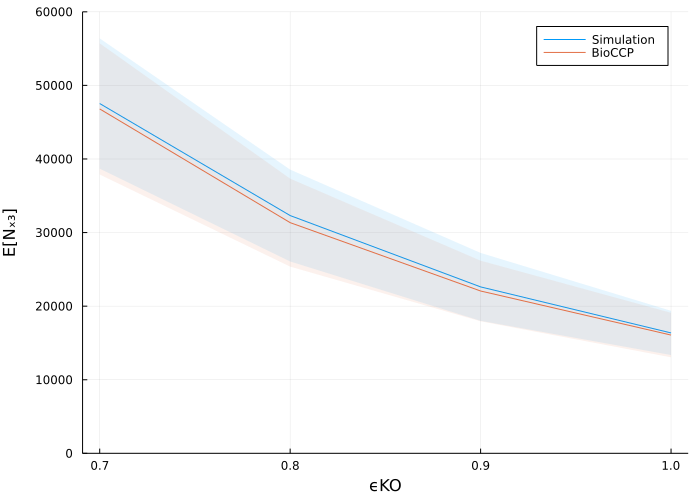

In [57]:
E_p_KO_sim = [E_p_KO70_sim, E_p_KO80_sim, E_p_KO90_sim,E_p_KO100_sim]
E_p_KO_bioccp = [E_p_KO70_bioccp, E_p_KO80_bioccp, E_p_KO90_bioccp, E_p_KO100_bioccp]
sd_p_KO_sim = [sd_p_KO70_sim, sd_p_KO80_sim, sd_p_KO90_sim,sd_p_KO100_sim]
sd_p_KO_bioccp = [sd_p_KO70_bioccp, sd_p_KO80_bioccp, sd_p_KO90_bioccp, sd_p_KO100_bioccp];

plot([0.7, 0.8, 0.9, 1], E_p_KO_sim, label="Simulation", 
    title="", xlabel="ϵKO", ylabel="E[Nₓ₃]",
    ribbon = sd_p_KO_sim, fillalpha=.1,
    xticks = ([0.7, 0.8, 0.9, 1], string.([0.7, 0.8, 0.9, 1])),
    yticks = (0:10000:110000, string.(0:10000:110000)),
    ylim=(0,60000),
size = ((700,500)),
titlefont=font(11),
guidefontsize =11, guidefontfamily=101)

plot!([0.7, 0.8, 0.9, 1], E_p_KO_bioccp,  label="BioCCP",
    ribbon = sd_p_KO_bioccp, 
    fillalpha=.1,
)

- Figure S1C: Influence of gRNA frequency distribution on plant library size for full combinatorial coverage (vary parameter ρ)

In [5]:
include("DefaultParameters_k=3.jl"); # reset to default values

In [ ]:
iter = 15

## default: ρ = 2
Random.seed!(1)
Es_p2_bioccp = zeros(iter, 6)
sds_p2_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6 # vary number of gRNAs per gene
    n_gRNA_total = x*g
    ρ  = 2; l = 50; u = 50*ρ 
    m = (l + u)/2
    sd = (u - l)/2
    p_gRNA_freq_2 = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize = true, visualize=false)
    p_gRNA_edit = ones(n_gRNA_total)
    E, sd = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq_2, 
                              p_gRNA_edit, ϵ_KO)
    Es_p2_bioccp[i,g] = E
    sds_p2_bioccp[i,g] = sd
    end
end


## ρ = 1
Random.seed!(1)
Es_p1_bioccp = zeros(iter, 6)
sds_p1_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6
        n_gRNA_total = x*g
        p_gRNA_freq_1 = ones(n_gRNA_total)/n_gRNA_total
        p_gRNA_edit = ones(n_gRNA_total)
        E, sd = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq_1, 
                              p_gRNA_edit, ϵ_KO)
        Es_p1_bioccp[i,g] = E
        sds_p1_bioccp[i,g] = sd
    end
end

## ρ = 4
Random.seed!(1)
Es_p4_bioccp = zeros(iter, 6)
sds_p4_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6 # vary number of gRNAs per gene
        n_gRNA_total = x*g
        ρ = 4; l = 50; u = 50 * ρ
        m = (l + u)/2
        sd = (u - l)/2
        p_gRNA_freq_4 = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize = true, visualize=false)
        p_gRNA_edit = ones(n_gRNA_total)
        E, sd = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq_4, 
                              p_gRNA_edit, ϵ_KO)
        Es_p4_bioccp[i,g] = E
        sds_p4_bioccp[i,g] = sd
    end
end

## ρ = 8
Random.seed!(1)
Es_p8_bioccp = zeros(iter, 6)
sds_p8_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6 # vary number of gRNAs per gene
        n_gRNA_total = x*g
        ρ  = 8; l = 50; u = 50 * ρ 
        m = (l + u)/2
        sd = (u - l)/2
        p_gRNA_freq_8 = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize = true, visualize=false)
        p_gRNA_edit = ones(n_gRNA_total)
        E, sd = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq_8, 
                              p_gRNA_edit, ϵ_KO)
        Es_p8_bioccp[i,g] = E
        sds_p8_bioccp[i,g] = sd
    end
end

In [49]:
(mean(Es_p1_bioccp, dims=1)[:])

6-element Vector{Float64}:
 16956.0
 18383.0
 18831.0
 19079.0
 19228.0
 19322.0

In [50]:
(mean(Es_p2_bioccp, dims = 1))[:]

6-element Vector{Float64}:
 23293.933333333334
 21373.533333333333
 20762.533333333333
 20730.066666666666
 20478.933333333334
 20440.933333333334

In [51]:
(mean(Es_p4_bioccp, dims = 1))[:]

6-element Vector{Float64}:
 47336.13333333333
 30061.733333333334
 25705.466666666667
 24722.866666666665
 23526.533333333333
 23267.533333333333

In [52]:
(mean(Es_p8_bioccp, dims = 1))[:]

6-element Vector{Float64}:
 110844.33333333333
  43427.2
  32035.0
  29323.466666666667
  27038.0
  26547.866666666665

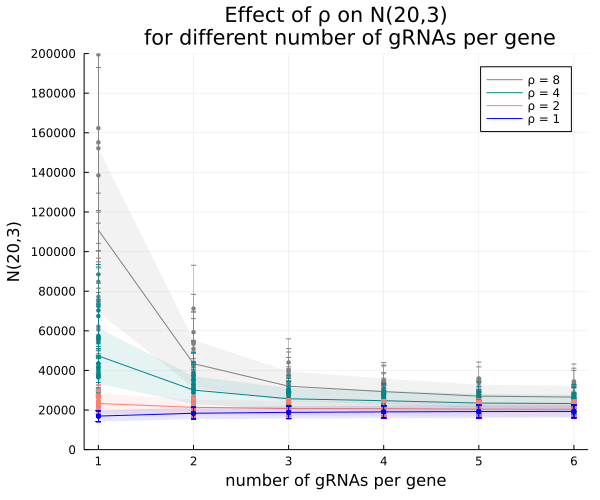

In [53]:
markersize = 2.5
markerstrokewidth=0.4

scatter(1:6, Es_p8_bioccp', errorbar=sds_p8_bioccp', color=:grey, label="",markersize=markersize, 
    markerstrokewidth=markerstrokewidth, markerstrokecolor=:grey)
plot!(1:6, mean(Es_p8_bioccp, dims=1)[:], color=:grey, ribbon=mean(sds_p8_bioccp, dims=1)[:],fillalpha=.1,
size = ((850,600)),label="ρ = 8", 
    ylim=(0,200000),
xlabel="number of gRNAs per gene", ylabel="N(20,3)", title="Effect of ρ on N(20,3)
    for different number of gRNAs per gene")


scatter!(1:6, Es_p4_bioccp', errorbar=sds_p4_bioccp', color=:turquoise4, label="",
    markersize=markersize, markerstrokewidth=markerstrokewidth,  markerstrokecolor=:turquoise4)
plot!(1:6, mean(Es_p4_bioccp, dims=1)[:], color=:turquoise4, ribbon=mean(sds_p4_bioccp, dims=1)[:],  fillalpha=.1,
     yticks = (0:20000:200000, string.(0:20000:200000)),label="ρ = 4")

scatter!(1:6, Es_p2_bioccp', errorbar=sds_p2_bioccp', color=:salmon, label="",
    markersize=markersize, markerstrokewidth=markerstrokewidth,  markerstrokecolor=:salmon)
plot!(1:6, mean(Es_p2_bioccp, dims=1)[:], color=:salmon, ribbon=mean(sds_p2_bioccp, dims=1)[:],  fillalpha=.1, label="ρ = 2")

scatter!(1:6, Es_p1_bioccp', errorbar=sds_p1_bioccp', color=:blue, label="", 
    markersize=markersize, markerstrokewidth=markerstrokewidth,  markerstrokecolor=:blue ) #, markeralpha=0)
plot!(1:6, mean(Es_p1_bioccp, dims=1)[:], color=:blue, ribbon=mean(sds_p1_bioccp, dims=1)[:],  fillalpha=.1,
size = ((600,500)),label="ρ = 1")


- Figure S1D: Influence of fraction of all gRNAs that is active on the plant library size for full combinatorial coverage

In [5]:
include("DefaultParameters_k=3.jl"); # reset to default values

In [6]:
iter = 15

# f_act = 0.7
Es_f7_bioccp = zeros(iter, 6)
sds_f7_bioccp = zeros(iter, 6) 

for i in 1:iter
    for g in 1:6 # vary number of gRNAs per gene
        n_gRNA_total = x*g
        p_gRNA_freq = ones(n_gRNA_total)/n_gRNA_total
        f_act = 0.7
        p_gRNA_edit_7 = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false);  
        E, sd = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit_7, ϵ_KO)
        Es_f7_bioccp[i,g] = E
        sds_f7_bioccp[i,g] = sd
    end
end

## f_act = 0.8
Es_f8_bioccp = zeros(iter, 6)
sds_f8_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6 # vary number of gRNAs per gene
        n_gRNA_total = x*g
        p_gRNA_freq = ones(n_gRNA_total)/n_gRNA_total
        f_act = 0.8
        p_gRNA_edit_8 = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false);  
        E, sd = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit_8, ϵ_KO)
        Es_f8_bioccp[i,g] = E
        sds_f8_bioccp[i,g] = sd
    end
end

## f_act = 0.9
Es_f9_bioccp = zeros(iter, 6)
sds_f9_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6 # vary number of gRNAs per gene
        n_gRNA_total = x*g
        p_gRNA_freq = ones(n_gRNA_total)/n_gRNA_total
        f_act = 0.9
        p_gRNA_edit_9 = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false);  

        E, sd = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit_9, ϵ_KO)
        Es_f9_bioccp[i,g] = E
        sds_f9_bioccp[i,g] = sd
    end
end


## f_act = 1
Es_f1_bioccp = zeros(iter, 6)
sds_f1_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6 # vary number of gRNAs per gene
        n_gRNA_total = x*g
        p_gRNA_freq = ones(n_gRNA_total)/n_gRNA_total
        f_act = 1
        p_gRNA_edit_1 = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false);  

        E, sd = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit_1, ϵ_KO)
        Es_f1_bioccp[i,g] = E
        sds_f1_bioccp[i,g] = sd
    end
end

In [7]:
Es_f1_bioccp

15×6 Matrix{Float64}:
 19702.0  21453.0  22097.0  22268.0  22371.0  22640.0
 19917.0  21414.0  21934.0  22372.0  22533.0  22521.0
 19934.0  21507.0  22082.0  22221.0  22378.0  22596.0
 19973.0  21668.0  22098.0  22221.0  22456.0  22433.0
 19934.0  21351.0  22209.0  22164.0  22450.0  22575.0
 19919.0  21559.0  21953.0  22237.0  22434.0  22445.0
 19686.0  21568.0  22091.0  22115.0  22529.0  22444.0
 19736.0  21551.0  21976.0  22371.0  22527.0  22546.0
 19777.0  21597.0  21801.0  22293.0  22338.0  22565.0
 19492.0  21365.0  21927.0  22318.0  22471.0  22573.0
 19631.0  21359.0  21942.0  22366.0  22372.0  22563.0
 20043.0  21654.0  22026.0  22282.0  22543.0  22524.0
 19640.0  21400.0  21975.0  22354.0  22443.0  22596.0
 19817.0  21407.0  21826.0  22237.0  22570.0  22550.0
 19750.0  21420.0  22078.0  22174.0  22342.0  22678.0

In [8]:
Es_f9_bioccp

15×6 Matrix{Float64}:
      3.10199e6   66753.0  50584.0  65460.0  66747.0  39223.0
 164733.0        215430.0  62231.0  25631.0  41379.0  30326.0
  19955.0         65935.0  38994.0  45601.0  35116.0  34198.0
      4.18201e6   59915.0  38249.0  41802.0  38229.0  32643.0
 708038.0         53710.0  33359.0  36727.0  38400.0  36416.0
      6.27062e6   45319.0  48133.0  35375.0  36417.0  37143.0
 751733.0         45013.0  53125.0  80248.0  40997.0  36966.0
 150855.0        271518.0  50374.0  37032.0  29855.0  44073.0
  19800.0        182150.0  38141.0  39659.0  31689.0  31072.0
 851305.0         44605.0  57949.0  31653.0  32452.0  40893.0
 846274.0         43587.0  35944.0  33175.0  50764.0  39626.0
 845946.0         66204.0  53764.0  38116.0  40050.0  35281.0
 675308.0         67053.0  33865.0  48049.0  50398.0  38770.0
 137900.0         46096.0  43295.0  39064.0  35004.0  36441.0
 126110.0         66482.0  27944.0  43253.0  32331.0  28367.0

In [9]:
Es_f8_bioccp

15×6 Matrix{Float64}:
      6.23865e6  379991.0         65948.0   60043.0   39004.0  80177.0
      5.48499e6       1.17277e6   45711.0   87022.0   56400.0  74390.0
      3.43866e6   65822.0        310984.0   90589.0   93030.0  58443.0
      2.48704e6       1.29822e6   96378.0  109045.0  112646.0  53987.0
 142128.0         72717.0        152377.0  102631.0   41452.0  44369.0
      2.19644e6  287814.0         47695.0   47137.0   52507.0  73627.0
      9.2169e6    86121.0         89634.0   48006.0   60158.0  56808.0
      9.57739e6  223648.0         89103.0  122229.0   61815.0  39930.0
      3.66634e6       2.85308e6  321000.0   57875.0   42417.0  61938.0
 898181.0        306837.0        418353.0   93637.0   87808.0  73284.0
      6.3215e6    66450.0         79162.0   66030.0   51601.0  47809.0
      2.18641e6   68229.0        111410.0  150368.0   69684.0  81200.0
 757157.0        100925.0         82203.0   97491.0   45421.0  47550.0
      7.57658e6  321918.0        113677.0   53478.0   4

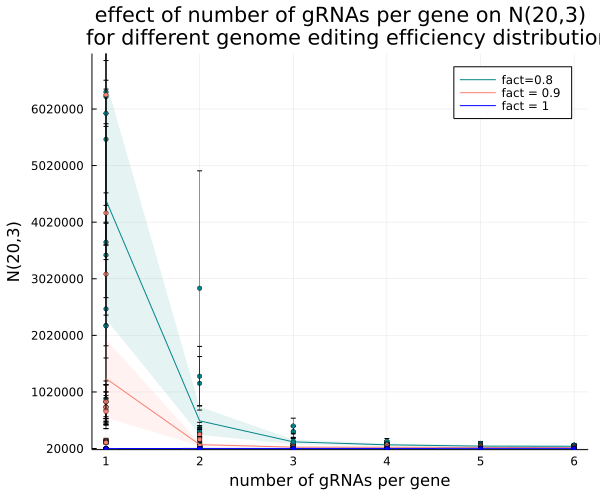

In [14]:
markersize = 2.5
markerstrokewidth=0.4

scatter(1:6, Es_f8_bioccp', errorbar=sds_f8_bioccp', color=:turquoise4, label="",markersize=markersize, markerstrokewidth=markerstrokewidth)
plot!(1:6, mean(Es_f8_bioccp, dims=1)[:], color=:turquoise4, ribbon=mean(sds_f8_bioccp, dims=1)[:],  fillalpha=.1,
    yticks = (20000:1000000:7000000, string.(20000:1000000:7000000)),
    label="fact=0.8",
        ylim=(0,7000000),
xlabel="number of gRNAs per gene", ylabel="N(20,3)", 
    title="effect of number of gRNAs per gene on N(20,3)
    for different genome editing efficiency distributions")

scatter!(1:6, Es_f9_bioccp', errorbar=sds_f9_bioccp', color=:salmon, label="", markersize=markersize, markerstrokewidth=markerstrokewidth)
plot!(1:6, mean(Es_f9_bioccp, dims=1)[:], color=:salmon, ribbon=mean(sds_f9_bioccp, dims=1)[:],  fillalpha=.1, label="fact = 0.9")

scatter!(1:6, Es_f1_bioccp', errorbar=sds_f1_bioccp', color=:blue, label="", markersize=markersize, markerstrokewidth=markerstrokewidth ) #, markeralpha=0)
plot!(1:6, mean(Es_f1_bioccp, dims=1)[:], color=:blue, ribbon=mean(sds_f1_bioccp, dims=1)[:],  fillalpha=.1,
size = ((600,500)),label="fact = 1")

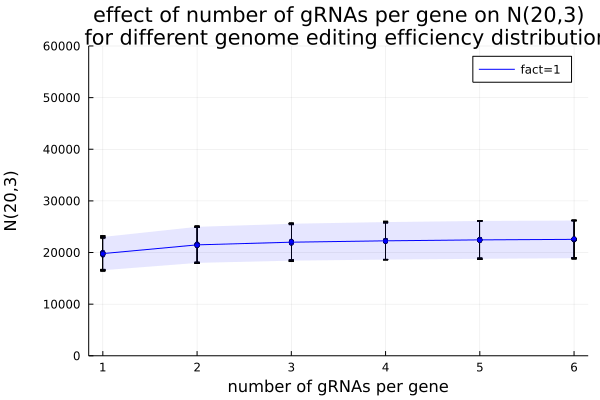

In [24]:
markersize = 2.5
markerstrokewidth=0.4

scatter(1:6, Es_f1_bioccp', errorbar=sds_f1_bioccp', color=:blue, label="",markersize=markersize, markerstrokewidth=markerstrokewidth)
plot!(1:6, mean(Es_f1_bioccp, dims=1)[:], color=:blue, ribbon=mean(sds_f1_bioccp, dims=1)[:],  fillalpha=.1,
     yticks = (0:10000:2000000, string.(0:10000:2000000)),
    label="fact=1",
        ylim=(0,60000),
xlabel="number of gRNAs per gene", ylabel="N(20,3)", 
    title="effect of number of gRNAs per gene on N(20,3)
    for different genome editing efficiency distributions")

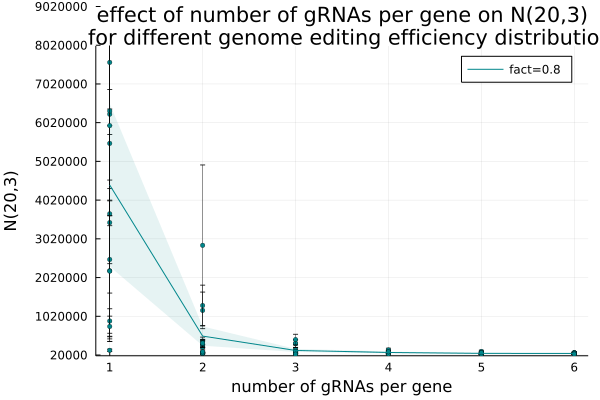

In [25]:
markersize = 2.5
markerstrokewidth=0.4

scatter(1:6, Es_f8_bioccp', errorbar=sds_f8_bioccp', color=:turquoise4, label="",markersize=markersize, markerstrokewidth=markerstrokewidth)
plot!(1:6, mean(Es_f8_bioccp, dims=1)[:], color=:turquoise4, ribbon=mean(sds_f8_bioccp, dims=1)[:],  fillalpha=.1,
     yticks = (20000:1000000:20000000, string.(20000:1000000:20000000)),
    label="fact=0.8",
        ylim=(0,8000000),
xlabel="number of gRNAs per gene", ylabel="N(20,3)", 
    title="effect of number of gRNAs per gene on N(20,3)
    for different genome editing efficiency distributions")

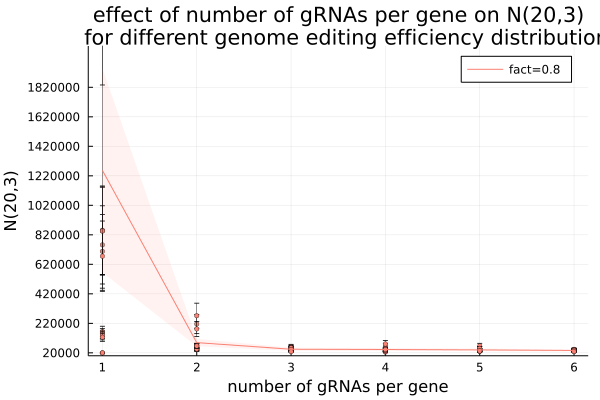

In [26]:
markersize = 2.5
markerstrokewidth=0.4

scatter(1:6, Es_f9_bioccp', errorbar=sds_f9_bioccp', color=:salmon, label="",markersize=markersize, markerstrokewidth=markerstrokewidth)
plot!(1:6, mean(Es_f9_bioccp, dims=1)[:], color=:salmon, ribbon=mean(sds_f9_bioccp, dims=1)[:],  fillalpha=.1,
     yticks = (20000:200000:2000000, string.(20000:200000:2000000)),
    label="fact=0.8",
        ylim=(0,2100000),
xlabel="number of gRNAs per gene", ylabel="N(20,3)", 
    title="effect of number of gRNAs per gene on N(20,3)
    for different genome editing efficiency distributions")

In [27]:
Es_f9_bioccp 

15×6 Matrix{Float64}:
      3.10199e6   66753.0  50584.0  65460.0  66747.0  39223.0
 164733.0        215430.0  62231.0  25631.0  41379.0  30326.0
  19955.0         65935.0  38994.0  45601.0  35116.0  34198.0
      4.18201e6   59915.0  38249.0  41802.0  38229.0  32643.0
 708038.0         53710.0  33359.0  36727.0  38400.0  36416.0
      6.27062e6   45319.0  48133.0  35375.0  36417.0  37143.0
 751733.0         45013.0  53125.0  80248.0  40997.0  36966.0
 150855.0        271518.0  50374.0  37032.0  29855.0  44073.0
  19800.0        182150.0  38141.0  39659.0  31689.0  31072.0
 851305.0         44605.0  57949.0  31653.0  32452.0  40893.0
 846274.0         43587.0  35944.0  33175.0  50764.0  39626.0
 845946.0         66204.0  53764.0  38116.0  40050.0  35281.0
 675308.0         67053.0  33865.0  48049.0  50398.0  38770.0
 137900.0         46096.0  43295.0  39064.0  35004.0  36441.0
 126110.0         66482.0  27944.0  43253.0  32331.0  28367.0